In [5]:
# Basic Deterministic Methods
def count_sarw(L, pos=(0, 0), visited=None):
    if visited is None:
        visited = set()
    
    if L == 0:
        return 1
    
    visited.add(pos)
    
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    count = 0
    
    for dx, dy in moves:
        new_pos = (pos[0] + dx, pos[1] + dy)
        if new_pos not in visited:
            count += count_sarw(L - 1, new_pos, visited.copy())
    
    return count

L = 2  # Example saw length
print(count_sarw(L))

12


0.190131
[0.041979, 0.028713, 0.019344, 0.012949, 0.008799, 0.006071, 0.004069, 0.002595, 0.001727, 0.001159, 0.000771, 0.000555, 0.00041, 0.000252, 0.000146, 9.3e-05, 6e-05, 4.6e-05, 4.3e-05, 1.7e-05, 1.7e-05, 7e-06, 6e-06, 3e-06, 3e-06, 1e-06, 2e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


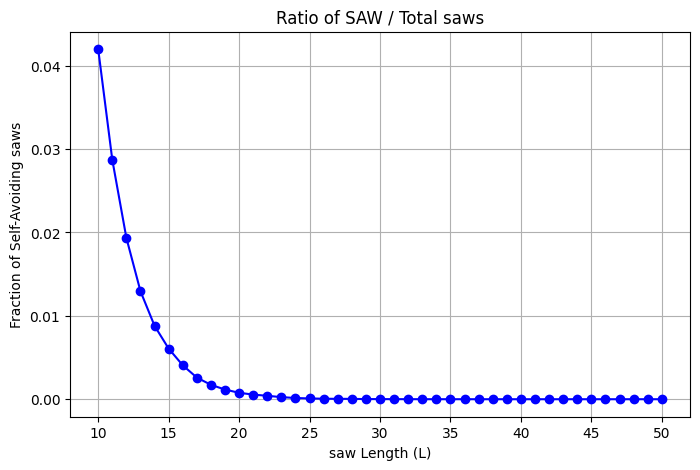

[2.9131523671928954, 2.896578587882056, 2.8792023069447557, 2.8631717061201467, 2.8525535086753635, 2.846278158664976, 2.835652262003163, 2.818061225456998, 2.8091584249110237, 2.8024512521657425, 2.79519885816715, 2.799150979212866, 2.8060513948357846, 2.7899675065317706, 2.768479808005066, 2.7593024672418824, 2.752207622048485, 2.76325772299988, 2.793266907255988, 2.7390042917728255, 2.7737987964008917, 2.7275506954868467, 2.747117388640989, 2.7208213659658247, 2.7518349437426344, 2.695450867212378, 2.7781473017184566, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


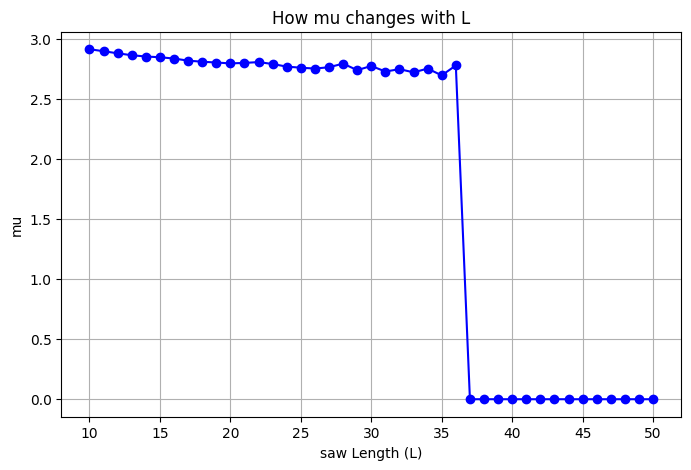

[1.0, 1.0, 0.750701, 0.562467, 0.390689, 0.276833, 0.191102, 0.13274, 0.090272, 0.061976, 0.041868]
[1.0, 4.0, 12.011216, 35.997888, 100.016384, 283.476992, 782.753792, 2174.81216, 5916.065792, 16246.636544, 43901.779968]


In [6]:
# Basic Monte Carlo I
import random
import matplotlib.pyplot as plt

def random_saw(L):
    pos = (0, 0)
    visited = {pos}
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    
    for _ in range(L):
        dx, dy = random.choice(moves)
        new_pos = (pos[0] + dx, pos[1] + dy)
        if new_pos in visited:
            return False  # Not a self-avoiding saw
        visited.add(new_pos)
        pos = new_pos
    
    return True  # Self-avoiding saw

def estimate_sarw_fraction(L, trials=1000000):
    count_sarw = sum(random_saw(L) for _ in range(trials))
    return count_sarw / trials

L = 6  # Example saw length
trials = 1000000  # Number of trials
print(estimate_sarw_fraction(L, trials))

# Plot SAW / total saw ratio for L = 10 to 50
L_values = range(10, 51)
ratios = [estimate_sarw_fraction(L, trials) for L in L_values]
print(ratios)


plt.figure(figsize=(8, 5))
plt.plot(L_values, ratios, marker='o', linestyle='-', color='b')
plt.xlabel('saw Length (L)')
plt.ylabel('Fraction of Self-Avoiding saws')
plt.title('Ratio of SAW / Total saws')
plt.grid()
plt.show()

#Values of mu as L increases
mu = []
L_values = range(10, 51)
for i, r in enumerate(ratios):
    mu.append(4 * r**(1/L_values[i]))

print(mu)

# Plot value of mu for L = 10 to 50

plt.figure(figsize=(8, 5))
plt.plot(L_values, mu, marker='o', linestyle='-', color='b')
plt.xlabel('saw Length (L)')
plt.ylabel('mu')
plt.title('How mu changes with L')
plt.grid()
plt.show()

#cL when L = 0 to 10
small_L_values = range(0, 11)
small_ratios = [estimate_sarw_fraction(L, trials) for L in small_L_values]
print(small_ratios)
cL = []
for i, r in enumerate(small_ratios):
    cL.append(4**small_L_values[i] * r)
print(cL)